# Part 1

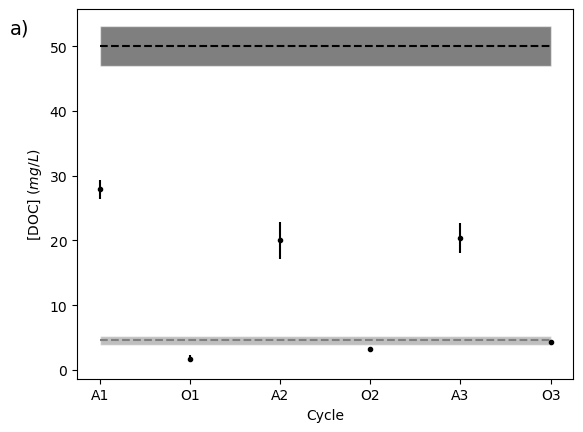
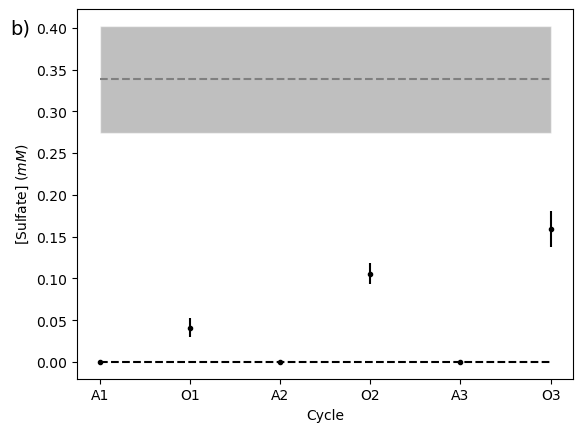\
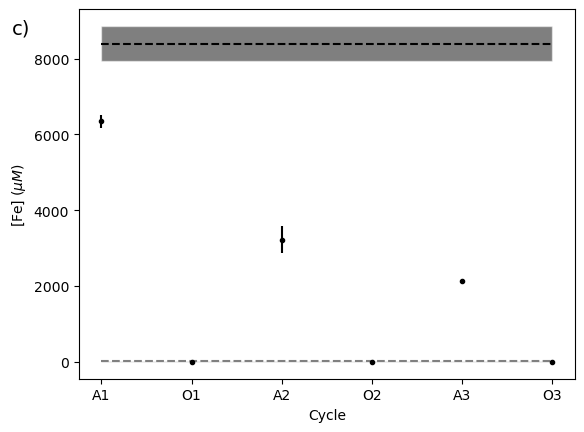
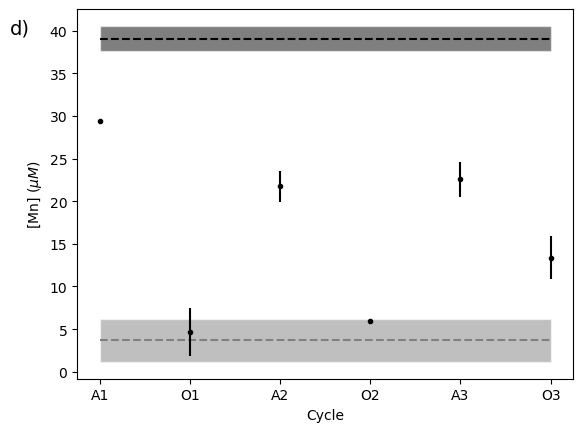\
**Fig. 1** Mean concentrations of Dissolved Organic Carbon (a), sulfate (b), Fe (c), and Mn (d) over 3 cycles. Each cycle includes an anoxic and oxic period. Cycles are labeled on the x axis according to anoxic/oxic conditions (A/O) followed by the cycle number. For example, the sample mean from cycle 1 at oxic conditions is O1. Error bars indicate standard deviation. The dashed, black line represents completely anoxic conditions. The dashed, grey line represents completely oxic conditions. The shaded regions indicate the error (standard deviation) of the completely anoxic/oxic sample sets.

Between all anoxic/oc

| Regression Variable | Equation | R squared |
| ------------------- | -------- | --------- |
| Annual Precipitation (cm) | 6.03x - 34.43 |0.721851 |
| Mean Annual Temperature (C) | 16.30x + 294.72 | 0.254830 |
| Ratio of Foliar Carbon to Nitrogen | -6.20x + 566.43 | 0.149004 |

**Table 1** All variables used in linear regression models of mean NPP, linear regression equations, and R squared values. Equations are functions of the corresponding regression variable. Annual precipitation resulted in the highest R squared value, indicating the greatest correlation to variance in mean NPP. Mean Annual Temperature and Ratio of Foliar Carbon to Nitrogen both resulted in much lower R squared values (differences of about 47% and 57% respectively). Given that Mean Annual Temperature and Ratio of Foliar Carbon to Nitrogen both have low R squared values, it is unlikely that these variables significantly affect mean NPP.

# Part 2
$NPP = 6.03*x-34.4 = 6.03*65-34.4 = 357.4$ $g$ $m^{-2}$ $yr^{-1}$

$Δ[Mn^{2+}] = 29.36418-4.62133=24.74285µM$

$Oxidized$ $Mn^{2+}$ $mass = 24.74285*10^{-6}M*0.1L*54.94g/mol = 0.000136g = 136µg$

$Mn^{2+}$ $oxidation$ $rate = 136µg_{Mn^{2+}}/(30g_{sediment}*2*24hr) = 0.0944$ $µg_{Mn^{2+}}$ $g_{sediment}^{-1}$ $hr^{-1}$ 

The oxidation rate of Mn<sup>2+</sup> during the first anoxic to oxic cycle is **0.0944 µg<sub>Mn<sup>2+</sup></sub> g<sub>sediment</sub><sup>-1</sup> hr<sup>-1</sup>**.

Three variables that may affect a full sized riparian wetland may be pH, water flow rates, and litterfall. In a riparian setting, it would be expected that a wetland is experiencing changes in flow rate. During times of high flux, such as in the case of a flood, we would expect the water to be more oxidized. These changes in flow are not accounted for in the experiment. Next, in the experiment, the pH of the solution was controlled to an average of 5. However, in a natural setting, pH is likely to experience higher variance. This may be caused by the presence of organisms undergoing metapolic reactions, water inputs of variable pH (ex. acid rain), and more. Finally, in a riparian wetland, the continued addition and decay of litterfall may affect concentration in ways that were unaccounted for in the experiment. For example, through this process some elements that may have been captured in the biomass of the plant may be released to solution.

# Code for Generating Figures

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [116]:
# Read in data
df = pd.read_csv('incubation_data_HW3.csv')
df

,Cycle,State,DOC_mgL-1,Error,Sulfate_mM,Error.1,Fe_uM,Error.2,Mn_uM,Error.3
0,1,Anoxic,27.906667,1.451926,0.000000,0.000000,6347.39035,174.05727,29.36418,0.06335
1,1,Oxic,1.753467,0.517602,0.041005,0.011568,1.89314,1.72413,4.62133,2.82457
2,2,Anoxic,20.018667,2.835970,0.000000,0.000000,3223.27706,358.55438,21.72418,1.86388
3,2,Oxic,3.297333,0.292271,0.105827,0.013117,5.14494,2.49502,5.99089,0.09757
4,3,Anoxic,20.438667,2.313653,0.000000,0.000000,2143.29331,11.65566,22.54822,2.04718
5,3,Oxic,4.282667,0.218732,0.159357,0.021363,1.82269,0.63681,13.36719,2.54714
6,0,Anoxic,50.040000,3.111270,0.000000,0.000000,8396.16626,466.22335,39.04909,1.49401
7,0,Oxic,4.556000,0.733505,0.338229,0.064050,14.06580,4.54148,3.70001,2.54148


In [117]:
df_anox = df[df['State'].str.contains('Anoxic')]
df_anox_C0 = df_anox.loc[df['Cycle'] == 0]
df_anox = df_anox.loc[df['Cycle'] > 0]

df_oxic = df[df['State'].str.contains('Oxic')]
df_oxic_C0 = df_oxic.loc[df['Cycle'] == 0]
df_oxic = df_oxic.loc[df['Cycle'] > 0]
df_anox

,Cycle,State,DOC_mgL-1,Error,Sulfate_mM,Error.1,Fe_uM,Error.2,Mn_uM,Error.3
0,1,Anoxic,27.906667,1.451926,0.0,0.0,6347.39035,174.05727,29.36418,0.06335
2,2,Anoxic,20.018667,2.835970,0.0,0.0,3223.27706,358.55438,21.72418,1.86388
4,3,Anoxic,20.438667,2.313653,0.0,0.0,2143.29331,11.65566,22.54822,2.04718


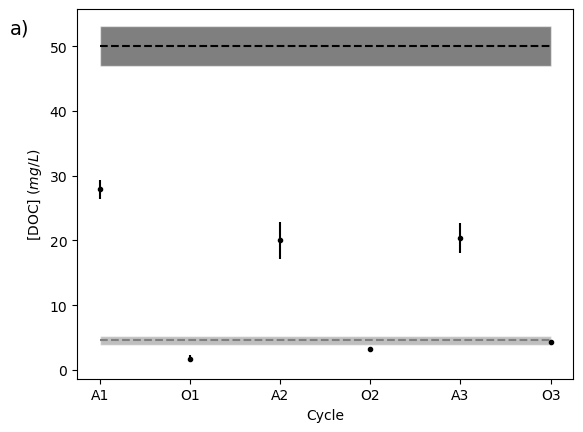

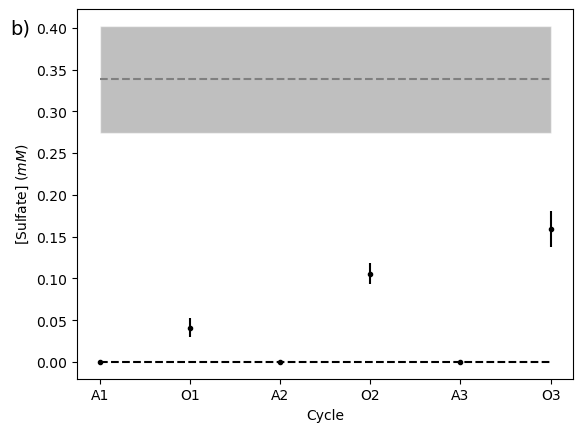

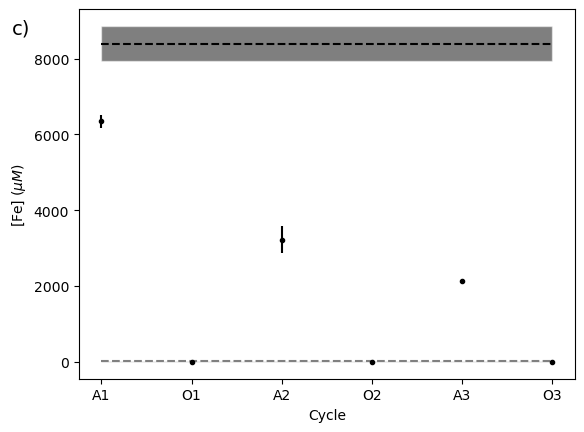

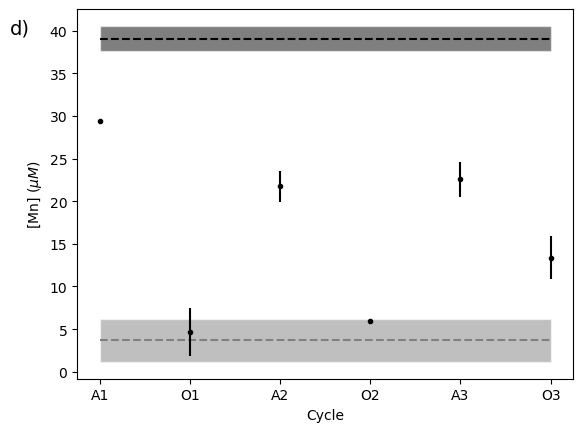

In [179]:
y_labels = ('[DOC] ($mg/L$)', '[Sulfate] ($mM$)', '[Fe] ($µM$)', '[Mn] ($µM$)')
plt_labels=('a)','b)','c)','d)')
df_fit = df['Cycle'] > 0
for i in range(4):
    
    col_off = 2*i
    
    oc0 = df_oxic_C0.iloc[:,2+col_off]
    oc0_err = df_oxic_C0.iloc[:,3+col_off]

    plt.plot([1,3.5],[oc0,oc0],'--', color='gray')
    plt.fill_between([1,3.5], oc0-oc0_err, oc0+oc0_err, alpha=0.5, color='gray', ec='#ffffffff')

    ac0 = df_anox_C0.iloc[:,2+col_off]
    ac0_err = df_anox_C0.iloc[:,3+col_off]

    plt.plot([1,3.5],[ac0,ac0],'--', color = 'black')
    plt.fill_between([1,3.5], ac0-ac0_err, ac0+ac0_err, alpha=0.5, color='black', ec='#ffffffff')
    
    plt.errorbar(df_anox['Cycle'],df_anox.iloc[:,2+col_off],
                 yerr=df_anox.iloc[:,3+col_off], fmt ='.', color='black')
    plt.errorbar(df_oxic['Cycle'].apply(lambda x: x+0.5),df_oxic.iloc[:,2+col_off],
                 yerr=df_oxic.iloc[:,3+col_off], fmt ='.', color='black')


    locs, labels = plt.xticks()
    plt.xticks([1, 1.5, 2, 2.5, 3, 3.5], ['A1','O1','A2','O2','A3','O3'])
    
    plt.ylabel(y_labels[i])
    plt.xlabel('Cycle')
    plt.gcf().text(0.02, 0.83, plt_labels[i], fontsize=14)    
    #np.Polyfit.fit(df_fit[)

    plt.show()

